Task 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

**Task 2: Load Natural Earth Dataset**

1. **How many columns does the dataset contain?** After running len(world.columns) in my notebook, I found that the dataset contains 169 columns.

2. **What type of geometries are included?** The dataset primarily includes Polygons and MultiPolygons, which map out the 2D shapes and borders of the countries.

3. **What does the geometry column represent?** The geometry column holds the actual spatial data—the collections of coordinate points that define the physical shape, boundaries, and exact location of each country on the map.

--- Task 2 Outputs ---
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     F

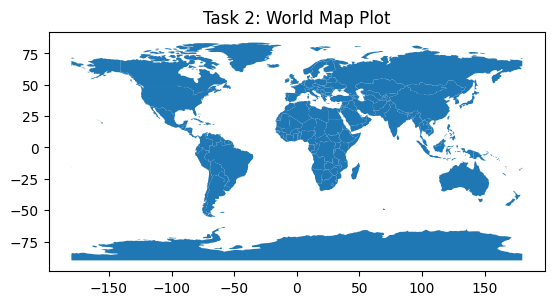

In [2]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print("--- Task 2 Outputs ---")
print(world.head())
world.plot()
plt.title("Task 2: World Map Plot")
plt.show()

**Task 3: Check the Coordinate Reference System**

1. **What does EPSG:4326 represent?** EPSG:4326 represents a Geographic Coordinate Reference System (specifically WGS 84). It indicates that the coordinates are mapped on a 3D spherical surface using latitude and longitude in degrees.

2. **Why is CRS important in spatial analysis?** I learned that without a defined CRS, we can't accurately translate coordinates onto the Earth's surface or align our spatial data with other map layers. If the CRS is wrong, any spatial measurements like distance or area will be completely distorted.

In [3]:
print("\n--- Task 3 Output ---")
print("Current CRS:", world.crs)


--- Task 3 Output ---
Current CRS: EPSG:4326


**Task 4: Convert to Metric CRS for Area Calculation**

1. **Why can't we compute area accurately using EPSG:4326?** Since EPSG:4326 uses degrees, and the actual physical distance of a "degree" shrinks as you move from the equator toward the poles, trying to calculate an area directly from degrees gives highly inaccurate and distorted results.

2. **What unit is EPSG:3857 based on?** EPSG:3857 (the Web Mercator projection) is a Projected Coordinate Reference System based on meters, which is why we switched to it for our area calculations.

In [4]:
# Reproject to Metric CRS
world_projected = world.to_crs(epsg=3857)

# Compute Area
world_projected["area_m2"] = world_projected.geometry.area

print("\n--- Task 4 Outputs ---")
print(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection ✅ Complete")


--- Task 4 Outputs ---
                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13

Area Reprojection ✅ Complete


**Task 5: Extract Centroid Coordinates**

1. **What is a centroid?** A centroid is the exact geometric center point, or the "center of mass," of a spatial feature like a country's polygon in our dataset.

2. **How can centroid coordinates be used in clustering?** Since machine learning algorithms need standard numerical data to calculate distances between points, reducing a complex country shape down to a single (X, Y) coordinate allows algorithms like K-Means to easily group countries based on their spatial proximity.

3. **Why do we extract X and Y separately?** Standard machine learning libraries like scikit-learn can't process complex Point geometry objects natively. I had to extract the X (longitude) and Y (latitude) into separate columns so the model could treat them as standard, independent numerical features.

In [5]:
# Extract Centroid
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print("\n--- Task 5 Outputs ---")
print(world_projected[["ADMIN", "x", "y"]].head())


--- Task 5 Outputs ---
                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06


**Task 5 (Part 2): Plot the top 10 largest countries by area**


--- Task 5 (Plotting) Output ---


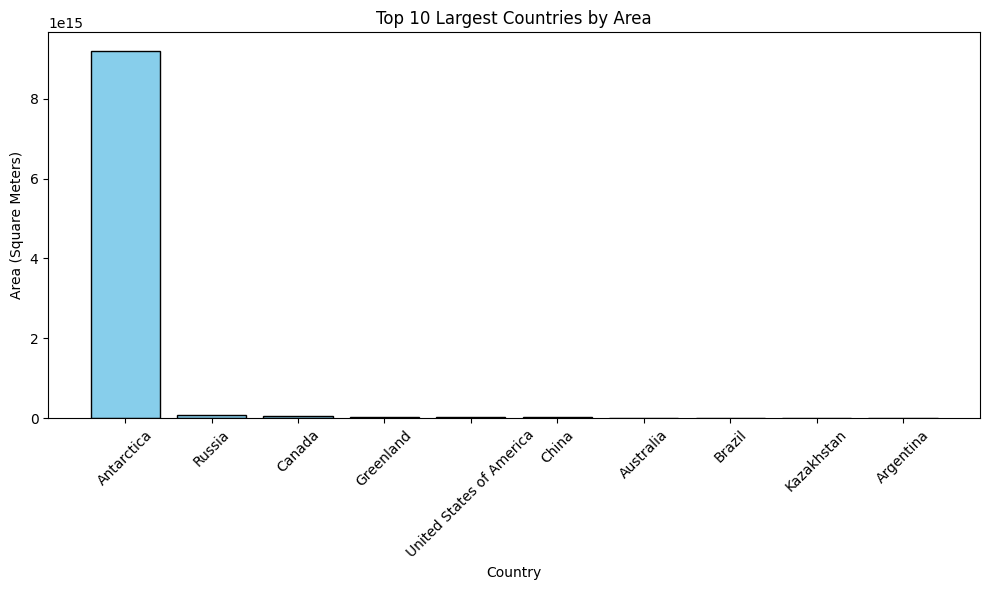

In [6]:
top_10_countries = world_projected.sort_values(by="area_m2", ascending=False).head(10)

# Create a bar chart for clear visualization
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries["ADMIN"], top_10_countries["area_m2"], color="skyblue", edgecolor="black")

# Formatting the plot
plt.title("Top 10 Largest Countries by Area")
plt.xlabel("Country")
plt.ylabel("Area (Square Meters)")
plt.xticks(rotation=45) # Rotates the country names so they are readable
plt.tight_layout() # Adjusts layout so labels don't get cut off

print("\n--- Task 5 (Plotting) Output ---")
plt.show()

**Reflection:**

One difficulty I encountered was initially around Coordinate Reference Systems, specifically understanding why area calculations fail so drastically when using standard degree-based coordinates like EPSG:4326. Through this lab, I learned that properly reprojecting spatial data into a metric system is an absolute requirement before any true geographic analysis or machine learning can happen. This hands-on experience with GeoPandas made me realize just how important accurate spatial data preprocessing will be for mapping vulnerable zones accurately in my hyper-local flood forecasting system for Santa Cruz. Ultimately, I now see that without the correct foundational geometries and metric projections, any predictive model relying on that geographic data will be fundamentally flawed.